# Описание проекта

Необходимо решить в каком из регионов наиболее прибыльно и наименее рискованно бурить новую скважину на основе данных о качестве нефти и объёме запасов

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import make_scorer
import sklearn
from numpy.random import RandomState

In [ ]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [ ]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [ ]:
data_0[data_0.duplicated() == True].count()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [ ]:
data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [ ]:
data_1[data_1.duplicated() == True].count()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [ ]:
data_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [ ]:
data_2[data_2.duplicated() == True].count()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Вывод: в данных нет пропусков, дубликатов, проблемных значений, следовательно предобработка не требуется

## Обучение и проверка модели
### Оценка корреляции признаков f0-f2 с целевым признаком

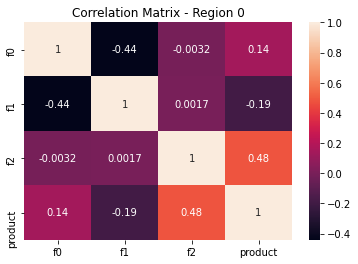

In [ ]:
corrMatrix = data_0.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix - Region 0')
plt.show()

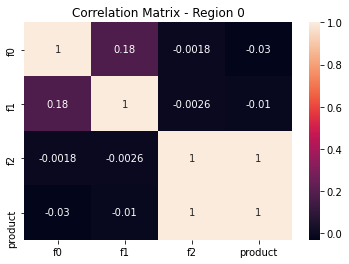

In [ ]:
corrMatrix = data_1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix - Region 0')
plt.show()

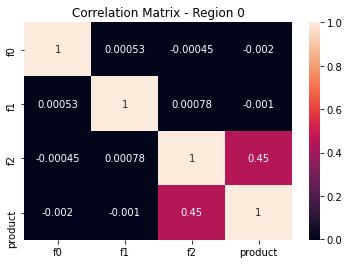

In [ ]:
corrMatrix = data_2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix - Region 0')
plt.show()

Вывод: Признак f2 для региона 1 полностью коррелирует

### Подготовка данных

In [ ]:
# разделение данных на признаки и целевую колонку

def features_target(data):
    features = data.drop(['product', 'id'], axis=1)
    target = data['product']
    return features, target

features0, target0 = features_target(data_0)
features1, target1 = features_target(data_1)
features2, target2 = features_target(data_2)

### Разделение на обучающую и валидационную выборки

In [ ]:
def train_valid_predict(features, target, region_no):
    
# разделение данных на обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)

# обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(features_train, target_train)
    
# предсказания модели на валидационной выборке
    predicted_valid = model.predict(features_valid)
    
    rmse = mean_squared_error(target_valid, predicted_valid, squared=False)
    
    print('features_train', features_train.shape)
    print('features_valid', features_valid.shape)
    print('target_train', target_train.shape)
    print('target_valid', target_valid.shape)
    print()
    
    print('Модель для региона', region_no)
    print('Среднеквадратичная ошибка (RMSE) =', rmse, 'тыс. баррелей')
    print('Средний запас предсказанного сырья =', predicted_valid.mean(), 'тыс. баррелей')
    
    return model, features_train, features_valid, target_train, target_valid, predicted_valid

### Проверка модели на адекватность

In [ ]:
model0, features_train0, features_valid0, target_train0, target_valid0, predicted_valid0 = train_valid_predict(features0, target0, 0)

features_train (75000, 3)
features_valid (25000, 3)
target_train (75000,)
target_valid (25000,)

Модель для региона 0
Среднеквадратичная ошибка (RMSE) = 37.5794217150813 тыс. баррелей
Средний запас предсказанного сырья = 92.59256778438035 тыс. баррелей


In [ ]:
def dummy_rmse(target_train, target_valid, region_no):

    predictions_dummy = pd.Series(target_train.mean(), index=target_valid.index)
    rmse = mean_squared_error(target_valid, predictions_dummy, squared=False)
    
    print('Dummy-модель для региона', region_no)
    print('Среднеквадратичная ошибка (RMSE) =', rmse, 'тыс. баррелей')
    print('Средний запас предсказанного сырья =', predictions_dummy.mean(), 'тыс. баррелей')

In [ ]:
dummy_rmse(target_train0, target_valid0, 0)

Dummy-модель для региона 0
Среднеквадратичная ошибка (RMSE) = 44.289591053907365 тыс. баррелей
Средний запас предсказанного сырья = 92.64046775305694 тыс. баррелей


In [ ]:
model1, features_train1, features_valid1, target_train1, target_valid1, predicted_valid1 = train_valid_predict(features1, target1, 1)

features_train (75000, 3)
features_valid (25000, 3)
target_train (75000,)
target_valid (25000,)

Модель для региона 1
Среднеквадратичная ошибка (RMSE) = 0.893099286775617 тыс. баррелей
Средний запас предсказанного сырья = 68.728546895446 тыс. баррелей


In [ ]:
dummy_rmse(target_train1, target_valid1, 1)

Dummy-модель для региона 1
Среднеквадратичная ошибка (RMSE) = 46.02144533725462 тыс. баррелей
Средний запас предсказанного сырья = 68.85895465854665 тыс. баррелей


In [ ]:
model2, features_train2, features_valid2, target_train2, target_valid2, predicted_valid2 = train_valid_predict(features2, target2, 2)

features_train (75000, 3)
features_valid (25000, 3)
target_train (75000,)
target_valid (25000,)

Модель для региона 2
Среднеквадратичная ошибка (RMSE) = 40.02970873393434 тыс. баррелей
Средний запас предсказанного сырья = 94.96504596800489 тыс. баррелей


In [ ]:
dummy_rmse(target_train2, target_valid2, 2)

Dummy-модель для региона 2
Среднеквадратичная ошибка (RMSE) = 44.90234968510566 тыс. баррелей
Средний запас предсказанного сырья = 95.03858906371526 тыс. баррелей


Выводы: Среднеквадратичная ошибка dummy-моделей больше, чем для лнейной регрессии, что свидетельствует об адекватности построенных моделей. Для региона 1 значительная разница может быть связана с высокой корреляцией признака f2 и целевого признака. Средний запас предсказанного сырья больше у dummy-моделей на <1 тыс. баррелей.

## Подготовка к расчёту прибыли

In [ ]:
WELLS_NO = 200
BUDGET = 10000000000
BARREL_PROFIT = 450000
VOLUME_CRIT = BUDGET / (WELLS_NO * BARREL_PROFIT) # достаточный объем сырья для безубыточной разработки скважины
VOLUME_CRIT

111.11111111111111

Вывод: Рассчитанный критический объем сырья составляет 111.1 тыс баррелей, это выше всех трех средних показателей по регионам. Именно поэтому нужно выбрать самые перспективные скважины в регионе.

## Расчёт прибыли и рисков

In [ ]:
# Функция для расчета прибыли
def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    volume = pd.Series(target[predictions_sorted.index])
    volume_selected = volume[:200]
    total_volume = volume_selected.sum()
    profit = 0.45 * total_volume - 10**4
    return profit

Оценка перспективности регионов с помощью техники Bootstrap

In [ ]:
def bootstrap_revenue(target, predictions, region_no):
    state = RandomState(12345)
    profits = []
    for i in range(1000):
        target_subs = target.sample(n=500, replace=True, random_state=state)
        predict_subs = predictions[target_subs.index]
        profits.append(profit(target_subs, predict_subs))
    profits = pd.Series(profits)
    #negative_percent = (profits[profits<0].count() / len(profits)) * 100
    negative_percent = (profits < 0).mean() *100
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    print('Регион', region_no)
    print(f'Средняя прибыль прогнозируется равной {profits.mean()} млн рублей')
    print(f'С вероятностью 95% прибыль составит от {lower} до {upper} млн рублей')
    print(f'Вероятность убытков по региону: {negative_percent}%')

In [ ]:
predicted_valid0 = pd.Series(predicted_valid0)
target_valid0 = target_valid0.reset_index(drop=True)
bootstrap_revenue(target_valid0, predicted_valid0, 0)

Регион 0
Средняя прибыль прогнозируется равной 425.9385269105927 млн рублей
С вероятностью 95% прибыль составит от -102.09009483793592 до 947.976353358369 млн рублей
Вероятность убытков по региону: 6.0%


In [ ]:
predicted_valid1 = pd.Series(predicted_valid1)
target_valid1 = target_valid1.reset_index(drop=True)
bootstrap_revenue(target_valid1, predicted_valid1, 1)

Регион 1
Средняя прибыль прогнозируется равной 515.2227734432902 млн рублей
С вероятностью 95% прибыль составит от 68.87322537050254 до 931.547591257049 млн рублей
Вероятность убытков по региону: 1.0%


In [ ]:
predicted_valid2 = pd.Series(predicted_valid2)
target_valid2 = target_valid2.reset_index(drop=True)
bootstrap_revenue(target_valid2, predicted_valid2, 2)

Регион 2
Средняя прибыль прогнозируется равной 435.00836278275585 млн рублей
С вероятностью 95% прибыль составит от -128.88054732978893 до 969.7069541802657 млн рублей
Вероятность убытков по региону: 6.4%


Вывод: в качестве предложения, следует обратить внимание на регион 1 в связи с относительно высокой средней прогнозируемой прибылью, и низкой вероятностью оказаться в убытке. Однако, следует обратить внимание на признак f2, который полностью коррелирует с целевым признаком в этом регионе. Возможно, имеется ошибка и оценка неверна.

Регионы 0 и 2 имеют примерно равные показатели и между ними следует выбирать исходя из терпимости к риску: регион 2 имеет большую вероятность убытков, но и несколько большую прогнозную прибыль, тогда так регион 0 - наоборот, более консервативный.